# Machine Learning Final Project

## Understanding the Data

This data was used in a competition to predict the return of a stock, with only a few days of data.

There are two files, one for training a model and one for testing the model.

The desired final product is to return two columns of data, one is the target variable id and the other is the prediction score.

Variable Descriptions:
- Feature_1 - Feature_25 = These features were given without a description, these may or may not be useful
- Ret_MinusTwo, Ret_MinusOne = The first two days with one stock value for each stock occurrence
- Ret_2 - Ret_120 = The third day's 2nd through 120th minute of stock values
- Ret_121 - Ret_180 = Target variables, id_{1-60}
- Ret_PlusOne, Ret_PlusTwo = Target variables, id_{61-62}
- Weight_Intraday, Weight_Daily = Weight given toward each intra or dialy predicted scores

### How the Predictions are Scored

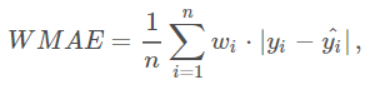
Figure 1

### Data Science Lifecycle

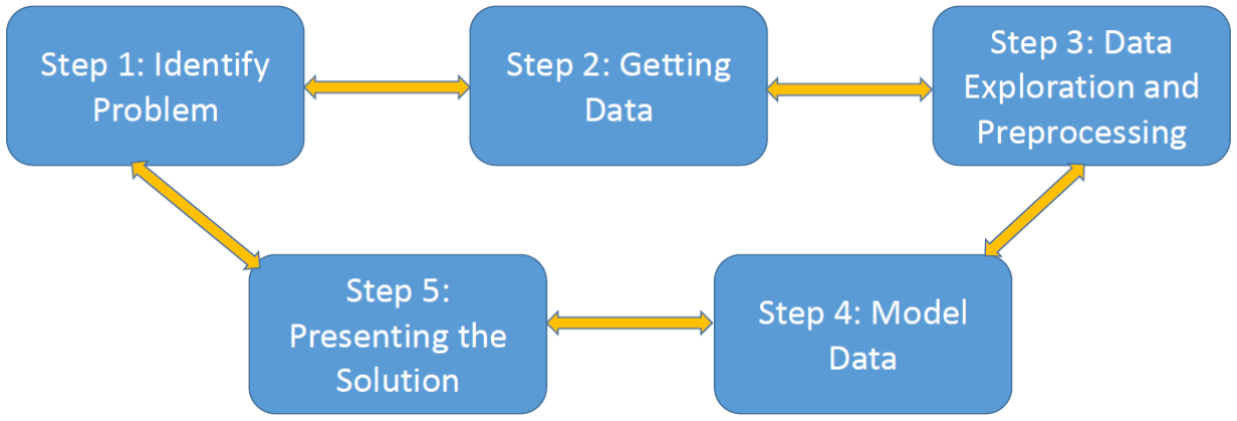
Figure 2

This document covers steps 3 and 4 in the data science lifecycle (see Figure 2). More specifically, the following steps outline, in detail, our steps 3 and 4 procedures.

1. Import libraries
2. Import dataset
3. Exploratory data analysis
3. Feature engineer isnull/innotnull
4. Imput median value
5. Feature engineering
6. Random forest for feature selection
7. Model the data
    - Linear models
        - OLS, Ridge, Lasso, Linear SVM
8. Model comparison
10. Cross-Validation and Pipelining
12. Implement model
    - On my test.csv file
11. Create final output (Id, Predicted)
12. Save final predictions to csv

## 1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## 2 Import dataset

In [185]:
stock_data = pd.read_csv("stock_competition/train.csv")

In [186]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 211 entries, Id to Weight_Daily
dtypes: float64(208), int64(3)
memory usage: 48.3 MB


## 3 Exploratory data analysis

In [187]:
# Look at column and row amounts
stock_data.shape

(30000, 211)

In [188]:
# Look at column names
stock_data.columns

Index(['Id', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       ...
       'Ret_175', 'Ret_176', 'Ret_177', 'Ret_178', 'Ret_179', 'Ret_180',
       'Ret_PlusOne', 'Ret_PlusTwo', 'Weight_Intraday', 'Weight_Daily'],
      dtype='object', length=211)

In [189]:
# Look at top 5 rows
stock_data.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,NaN,NaN,NaN,NaN,8,NaN,75751,0.2254,11.0,...,-0.002688,0.002246,-0.000838,-6.953220e-04,0.000003,-0.001974,-0.019512,0.028846,1251507.966,1564384.957
1,2,NaN,NaN,NaN,NaN,3,0.388896,17369,0.0166,13.0,...,-0.000129,0.000123,0.000248,3.320000e-07,0.000003,0.000027,-0.002939,-0.010253,1733950.349,2167437.936
2,3,NaN,-0.696727,0.739591,-0.167928,9,0.471947,8277,0.3650,9.0,...,-0.000524,-0.000394,0.000116,5.322560e-04,0.000274,0.000784,-0.024791,0.015711,1529197.383,1911496.729
3,4,NaN,-0.694350,1.568248,0.479073,5,0.120653,22508,0.2654,13.0,...,0.000346,-0.000090,0.000288,-1.281100e-04,0.000074,0.000341,-0.005680,-0.002190,1711569.424,2139461.780
4,5,6.0,-1.736489,2.765531,1.245280,7,4.866985,22423,0.2138,13.0,...,-0.001235,0.000027,0.002449,8.620000e-06,0.001209,-0.000004,0.036104,-0.026552,1267270.265,1584087.831


In [190]:
# Look at bottom 5 rows
stock_data.tail()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
29995,29996,NaN,NaN,0.922384,0.958507,7,0.101823,59401,0.3418,11.0,...,0.001411,-0.000931,-0.000467,9.950000e-08,-0.001378,-0.000461,-0.001868,-0.013325,1367453.044,1709316.305
29996,29997,NaN,1.509764,-0.557242,-1.055030,10,-0.280802,81834,NaN,9.0,...,-0.000454,-0.000934,0.001389,2.310070e-04,0.000711,-0.000491,0.004713,0.084269,1402663.934,1753329.917
29997,29998,NaN,-1.180446,0.508142,NaN,1,0.042848,56380,0.0111,9.0,...,0.000902,-0.000437,0.001172,1.173765e-03,0.001185,0.000292,0.054390,-0.034881,1436448.591,1795560.739
29998,29999,NaN,-0.253198,-0.194849,-0.083372,5,-0.193416,43166,0.2138,8.0,...,0.000888,0.002231,0.001191,4.347520e-04,0.001653,0.000144,0.011445,0.017182,1741726.934,2177158.668
29999,30000,NaN,-0.014088,0.092585,0.193587,8,NaN,38585,0.3318,8.0,...,0.000189,0.000165,0.000141,1.120000e-05,0.000337,0.000322,0.004096,0.012857,1324705.322,1655881.653


In [191]:
# Look at explanatory feature descriptives
stock_data.iloc[:,1:147].describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
count,4992.000000,23131.000000,29054.000000,24156.000000,30000.000000,28537.000000,30000.000000,29647.000000,28596.000000,15343.000000,...,29517.000000,2.966600e+04,29596.000000,29586.000000,29537.000000,2.954700e+04,29639.000000,29604.000000,2.961500e+04,3.000000e+04
mean,3.571514,-0.111505,0.553715,0.402231,5.474700,0.425327,49154.984100,0.197066,10.670968,4.742488,...,0.000023,-1.120495e-05,0.000024,-0.000019,0.000048,2.615735e-05,0.000005,-0.000030,1.161267e-05,-4.084749e-06
std,2.784394,1.235425,0.901438,0.799797,2.947584,1.488111,28164.085278,0.138104,2.850590,0.869671,...,0.001037,1.074087e-03,0.001254,0.000997,0.000992,1.061848e-03,0.001099,0.001098,1.140198e-03,1.241872e-03
min,1.000000,-3.440521,-4.643526,-5.331560,1.000000,-0.901579,338.000000,0.009800,0.000000,1.000000,...,-0.023572,-2.460318e-02,-0.090523,-0.031687,-0.013407,-3.515707e-02,-0.029431,-0.066786,-7.788409e-02,-1.374940e-02
25%,1.000000,-0.957895,-0.110986,-0.116302,2.000000,-0.268523,26143.000000,0.016600,9.000000,5.000000,...,-0.000330,-3.498963e-04,-0.000330,-0.000365,-0.000307,-3.306965e-04,-0.000342,-0.000356,-3.352075e-04,-3.476865e-04
50%,3.000000,-0.374876,0.431109,0.397914,6.000000,0.052073,48424.000000,0.213800,11.000000,5.000000,...,0.000002,-3.065000e-07,0.000001,-0.000002,0.000002,8.030000e-07,0.000000,-0.000002,7.370000e-07,-2.000000e-07
75%,6.000000,0.422389,1.061751,0.942286,8.000000,0.555906,72364.000000,0.331800,12.000000,5.000000,...,0.000367,3.498942e-04,0.000373,0.000316,0.000356,3.536185e-04,0.000352,0.000321,3.616355e-04,3.455500e-04
max,10.000000,4.175150,4.465478,2.953163,10.000000,12.609885,99861.000000,0.365000,36.000000,6.000000,...,0.021391,4.499840e-02,0.026100,0.017182,0.021729,1.307016e-02,0.014224,0.022986,2.552056e-02,1.160767e-01


In [192]:
# Look at response variable descriptives
stock_data.iloc[:,-4:].describe()

,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
count,30000.000000,30000.000000,3.000000e+04,3.000000e+04
mean,-0.000182,0.000010,1.504811e+06,1.881014e+06
std,0.025388,0.024046,2.065124e+05,2.581405e+05
min,-0.627690,-0.395398,1.000035e+06,1.250044e+06
25%,-0.010509,-0.010032,1.356715e+06,1.695894e+06
50%,-0.000222,-0.000256,1.478781e+06,1.848476e+06
75%,0.010067,0.009755,1.625020e+06,2.031275e+06
max,0.795602,0.303038,2.761229e+06,3.451536e+06


In [193]:
# Look at how many null values there are in each feature
stock_data.iloc[:,1:147].isnull().sum()

Feature_1       25008
Feature_2        6869
Feature_3         946
Feature_4        5844
Feature_5           0
Feature_6        1463
Feature_7           0
Feature_8         353
Feature_9        1404
Feature_10      14657
Feature_11        733
Feature_12        829
Feature_13        463
Feature_14        523
Feature_15       1586
Feature_16        460
Feature_17        470
Feature_18        422
Feature_19        895
Feature_20       5882
Feature_21        753
Feature_22       1024
Feature_23       1281
Feature_24        550
Feature_25        484
Ret_MinusTwo        0
Ret_MinusOne        0
Ret_2             780
Ret_3             956
Ret_4             877
                ...  
Ret_91            565
Ret_92            333
Ret_93            463
Ret_94            456
Ret_95            487
Ret_96            498
Ret_97            412
Ret_98            443
Ret_99            459
Ret_100           549
Ret_101           513
Ret_102           371
Ret_103           526
Ret_104           465
Ret_105   

In [194]:
first_stock_data = stock_data.iloc[:,1:26]
second_stock_data = stock_data.iloc[:,-4:-2]
corr_stock_data = pd.concat([first_stock_data, second_stock_data], axis = 1)
corr_stock_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_PlusOne,Ret_PlusTwo
0,NaN,NaN,NaN,NaN,8,NaN,75751,0.2254,11.0,NaN,...,NaN,-0.925463,2.0,NaN,-0.489492,NaN,NaN,NaN,-0.019512,0.028846
1,NaN,NaN,NaN,NaN,3,0.388896,17369,0.0166,13.0,NaN,...,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,-0.002939,-0.010253
2,NaN,-0.696727,0.739591,-0.167928,9,0.471947,8277,0.3650,9.0,5.0,...,1.799813,-1.603488,3.0,NaN,0.389061,1.728096,-1.798090,-1.019370,-0.024791,0.015711
3,NaN,-0.694350,1.568248,0.479073,5,0.120653,22508,0.2654,13.0,5.0,...,1.565036,NaN,7.0,1.148738,-2.440799,1.551425,-1.788725,NaN,-0.005680,-0.002190
4,6.0,-1.736489,2.765531,1.245280,7,4.866985,22423,0.2138,13.0,4.0,...,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820,0.036104,-0.026552


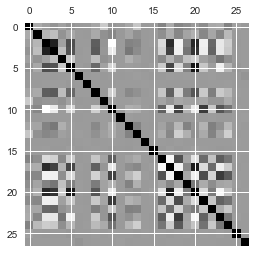

In [195]:
plt.matshow(corr_stock_data.corr())

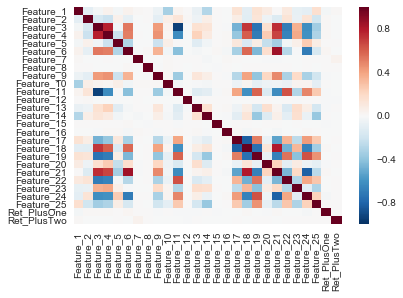

In [196]:
sns.heatmap(corr_stock_data.corr())

## 4 Feature engineer isnull/isnotnull

In [197]:
# New isnull or isnotnull features for Feature_1 through Feature_25, Ret_MinusTwo, and Ret_MinusOne
# This makes 27 new features
'''
We commented this out because the many time we ran our model, these features were never in the top ranking,
they were always in the bottom ranking. Therefore, we took them out to help out models run faster.
stock_data2 = pd.DataFrame()
for feature in stock_data.columns[1:28]:
    stock_data2['isnull_'+feature] = stock_data[feature].isnull()
    stock_data2['isnull_'+feature][stock_data2['isnull_'+feature] == True] = 1
    stock_data2['isnull_'+feature][stock_data2['isnull_'+feature] == False] = 0
'''

"\nWe commented this out because the many time we ran our model, these features were never in the top ranking,\nthey were always in the bottom ranking. Therefore, we took them out to help out models run faster.\nstock_data2 = pd.DataFrame()\nfor feature in stock_data.columns[1:28]:\n    stock_data2['isnull_'+feature] = stock_data[feature].isnull()\n    stock_data2['isnull_'+feature][stock_data2['isnull_'+feature] == True] = 1\n    stock_data2['isnull_'+feature][stock_data2['isnull_'+feature] == False] = 0\n"

## 5 Imput median value

In [198]:
# Fill all null cells in each feature with the median of that features nonnull values
stock_data3 = pd.DataFrame()
for column in stock_data.columns[1:28]:
    stock_data3[column] = stock_data[column].fillna(np.nanmedian(stock_data[column]))

## 6 Feature engineering

In [199]:
# Define functions for using np.log() and np.sqrt() functions on columns with the .apply() method
def log_trans(s):
    if s!=0:
        t=np.log(s)
    else:
        t=0
    return t

def sqrt_trans(s):
    if s!=0:
        t=np.sqrt(s)
    else:
        t=0
    return t

In [200]:
# Make new features: Squared, Log, and Sqrt
'''
stock_data4 = pd.DataFrame()
for column in stock_data.columns[1:28]:
    stock_data4[column+'_'+column] = stock_data3[column] * stock_data3[column]
    stock_data4['log_'+column] = stock_data3[column].apply(log_trans)
    stock_data4['sqrt_'+column] = stock_data3[column].apply(sqrt_trans)
'''

"\nstock_data4 = pd.DataFrame()\nfor column in stock_data.columns[1:28]:\n    stock_data4[column+'_'+column] = stock_data3[column] * stock_data3[column]\n    stock_data4['log_'+column] = stock_data3[column].apply(log_trans)\n    stock_data4['sqrt_'+column] = stock_data3[column].apply(sqrt_trans)\n"

In [201]:
# Some of the Log and Sqrt values are 0, so we need to put the median in for those
'''
stock_data5 = pd.DataFrame()
for column in stock_data4.columns:
    stock_data5[column] = stock_data4[column].fillna(np.nanmedian(stock_data4[column]))
'''

'\nstock_data5 = pd.DataFrame()\nfor column in stock_data4.columns:\n    stock_data5[column] = stock_data4[column].fillna(np.nanmedian(stock_data4[column]))\n'

In [202]:
# Difference between Ret_MinusOne and Ret_MinusTwo
'''
stock_data6 = pd.DataFrame()
stock_data6['diff_MinusOne_MinusTwo'] = stock_data['Ret_MinusOne'] - stock_data['Ret_MinusTwo']

# Difference between Ret_MinusOne and Ret_MinusTwo added back to Ret_MinusOne
stock_data6['diff_add_MinusOne_MinusTwo'] = (stock_data['Ret_MinusOne'] - stock_data['Ret_MinusTwo']) + stock_data['Ret_MinusOne']

# Average between Ret_MinusOne and Ret_MinusTwo
stock_data6['avg_MinusOne_MinusTwo'] = stock_data['Ret_MinusOne'] + stock_data['Ret_MinusTwo'] / 2
'''

"\nstock_data6 = pd.DataFrame()\nstock_data6['diff_MinusOne_MinusTwo'] = stock_data['Ret_MinusOne'] - stock_data['Ret_MinusTwo']\n\n# Difference between Ret_MinusOne and Ret_MinusTwo added back to Ret_MinusOne\nstock_data6['diff_add_MinusOne_MinusTwo'] = (stock_data['Ret_MinusOne'] - stock_data['Ret_MinusTwo']) + stock_data['Ret_MinusOne']\n\n# Average between Ret_MinusOne and Ret_MinusTwo\nstock_data6['avg_MinusOne_MinusTwo'] = stock_data['Ret_MinusOne'] + stock_data['Ret_MinusTwo'] / 2\n"

In [203]:
# Intradays, use rows to aggregate: Average, StDev, Min, Max, Skew, Kurtosis, Autocorr
stock_data1 = pd.DataFrame()
stock_data1_1 = stock_data.iloc[:,28:147]
stock_data1['Ret_intra_average'] = stock_data1_1.mean(axis = 1, skipna = True) # average
stock_data1['Ret_intra_stdev'] = stock_data1_1.std(axis = 1, skipna = True) # stdev
stock_data1['Ret_intra_min'] = stock_data1_1.min(axis = 1, skipna = True) # min
stock_data1['Ret_intra_max'] = stock_data1_1.max(axis = 1, skipna = True) # max
stock_data1['Ret_intra_skew'] = stock_data1_1.skew(axis = 1, skipna = True) # skew
stock_data1['Ret_intra_kurtosis'] = stock_data1_1.kurtosis(axis = 1, skipna = True) # kurtosis
# autocorr

# Intradays, diff(max - min), minute diff(max - min), diff(newest - oldest)
stock_data1['Ret_range'] = stock_data1_1.max(axis = 1, skipna = True) - stock_data1_1.min(axis = 1, skipna = True)
stock_data1['Time_max_to_min'] = stock_data1_1.idxmax(axis = 1).apply(stock_data1_1.columns.get_loc) - stock_data1_1.idxmin(axis = 1).apply(stock_data1_1.columns.get_loc)

for column in stock_data1_1.columns:
    stock_data1_1[column] = stock_data1_1[column].fillna(stock_data1_1.mean(axis = 1, skipna = True), axis = 0)

stock_data1['Ret_intra_diff'] = stock_data1_1['Ret_120'] - stock_data1_1['Ret_2'] # diff(newest - oldest)

### Merge Original and Engineered DataFrames

In [204]:
# Merge isnull isnotnull, original with median added, interaction squared log sqrt, and diff
stock_data7 = pd.concat([stock_data3, stock_data1_1, stock_data1], axis = 1) # took out stock_data2
stock_data1_1, stock_data4, stock_data5, stock_data6, stock_data1 = 0, 0, 0, 0, 0 # took out stock_data2

In [205]:
# Look at column and row amounts
stock_data7.shape

(30000, 155)

In [206]:
stock_data7.isnull().sum()

Feature_1             0
Feature_2             0
Feature_3             0
Feature_4             0
Feature_5             0
Feature_6             0
Feature_7             0
Feature_8             0
Feature_9             0
Feature_10            0
Feature_11            0
Feature_12            0
Feature_13            0
Feature_14            0
Feature_15            0
Feature_16            0
Feature_17            0
Feature_18            0
Feature_19            0
Feature_20            0
Feature_21            0
Feature_22            0
Feature_23            0
Feature_24            0
Feature_25            0
Ret_MinusTwo          0
Ret_MinusOne          0
Ret_2                 0
Ret_3                 0
Ret_4                 0
                     ..
Ret_100               0
Ret_101               0
Ret_102               0
Ret_103               0
Ret_104               0
Ret_105               0
Ret_106               0
Ret_107               0
Ret_108               0
Ret_109               0
Ret_110         

In [207]:
stock_data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 155 entries, Feature_1 to Ret_intra_diff
dtypes: float64(152), int64(3)
memory usage: 35.5 MB


In [208]:
for column in stock_data7.columns:
    stock_data7[column] = stock_data7[column].astype('float32')

In [209]:
stock_data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 155 entries, Feature_1 to Ret_intra_diff
dtypes: float32(155)
memory usage: 17.7 MB


## 7 Random forest for feature selection

In [55]:
# Set up X and y, and all the X and y train and test datasets
X = pd.concat([stock_data7, stock_data['Weight_Daily']], axis = 1)
y = stock_data['Ret_PlusOne']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 86)

In [56]:
# Extract Weight_Daily from X_train and X_test
X_test_Weight_Daily = X_test.Weight_Daily
X_train_Weight_Daily = X_train.Weight_Daily
X_test = X_test.drop("Weight_Daily", 1)
X_train = X_train.drop("Weight_Daily", 1)

In [57]:
# Instantiate and fit the model on the training dataset
rf = RandomForestRegressor(random_state = 45, n_estimators = 10, n_jobs = -1).fit(X_train, y_train)
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=45,
           verbose=0, warm_start=False)

In [58]:
# Put feature importances in a DataFrame and order it by importance values
important = pd.DataFrame(rf.feature_importances_, index = stock_data7.columns, columns = ['imp']) # place feature names and importances in a pandas DataFrame to make it easier to plot
import_sorted = important.sort_values(by = 'imp', ascending = False) # sort the feature importances by their importance weights (least to greatest)
import_sorted

,imp
Ret_112,0.026622
Ret_68,0.019911
Ret_86,0.017987
Ret_71,0.017352
Ret_66,0.017116
Ret_29,0.016492
Ret_75,0.014171
Ret_40,0.013336
Ret_8,0.012301
Feature_7,0.011941


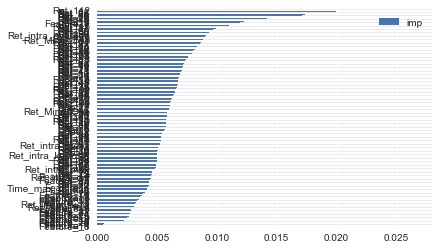

In [59]:
# Get a graph of all feature importances
importa = important.sort_values(by = 'imp', ascending = True)
importa.plot(kind = 'barh')

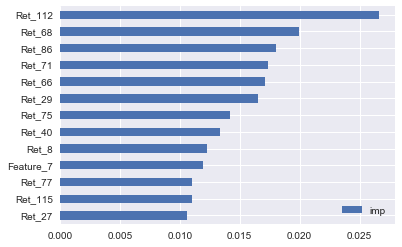

In [60]:
new_importances = importa[importa['imp'] > 0.01]
new_importances.plot(kind = 'barh')

In [61]:
new_importances.sort_values(by = 'imp', ascending = False)

,imp
Ret_112,0.026622
Ret_68,0.019911
Ret_86,0.017987
Ret_71,0.017352
Ret_66,0.017116
Ret_29,0.016492
Ret_75,0.014171
Ret_40,0.013336
Ret_8,0.012301
Feature_7,0.011941


In [62]:
new_importances.index

Index(['Ret_27', 'Ret_115', 'Ret_77', 'Feature_7', 'Ret_8', 'Ret_40', 'Ret_75',
       'Ret_29', 'Ret_66', 'Ret_71', 'Ret_86', 'Ret_68', 'Ret_112'],
      dtype='object')

In [63]:
# Competition prediction accuracy measure - TRAIN
pred_y = rf.predict(X_train)
#(1 / len(y_train)) * (X_train_Weight_Daily * (abs(pred_y - y_train))).sum()
mean_absolute_error(y_train, pred_y, sample_weight = X_train_Weight_Daily)

0.0061868468159179645

In [64]:
# Competition prediction accuracy measure - TEST
pred_y = rf.predict(X_test)
#(1 / len(y_test)) * (X_test_Weight_Daily * (abs(pred_y - y_test))).sum()
mean_absolute_error(y_test, pred_y, sample_weight = X_test_Weight_Daily)

0.015171858900269643

## 8 Model the data

### OLS on Original Dataset as a Baseline
- The dataset called stock_data3, with only the median added into empty cells

In [65]:
# t stands for temporary
tX = pd.concat([stock_data3, stock_data['Weight_Daily']], axis = 1)
ty = stock_data['Ret_PlusOne']
tX_train, tX_test, ty_train, ty_test = train_test_split(tX, ty, train_size = 0.8, random_state = 86)

In [66]:
# Extract Weight_Daily from X_train and X_test
tX_test_Weight_Daily = tX_test.Weight_Daily
tX_train_Weight_Daily = tX_train.Weight_Daily
tX_test = tX_test.drop("Weight_Daily", 1)
tX_train = tX_train.drop("Weight_Daily", 1)

In [67]:
lr = LinearRegression().fit(tX_train, ty_train)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
# Competition prediction accuracy measure - TRAIN
pred_ty = lr.predict(tX_train)
#(1 / len(ty_train)) * (tX_train_Weight_Daily * (abs(pred_ty - ty_train))).sum()
mean_absolute_error(ty_train, pred_ty, sample_weight = tX_train_Weight_Daily)

0.015147730849350075

In [69]:
# Competition prediction accuracy measure - TEST
pred_ty = lr.predict(tX_test)
#(1 / len(ty_test)) * (tX_test_Weight_Daily * (abs(pred_ty - ty_test))).sum()
mean_absolute_error(ty_test, pred_ty, sample_weight = tX_test_Weight_Daily)

0.015028496731191934

### OLS on 150+ Featured Dataset
- Dataset including all engineered features

In [70]:
lr2 = LinearRegression().fit(X_train, y_train)
lr2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
# Competition prediction accuracy measure - TRAIN
pred_y = lr2.predict(X_train)
#(1 / len(y_train)) * (X_train_Weight_Daily * (abs(pred_y - y_train))).sum()
mean_absolute_error(y_train, pred_y, sample_weight = X_train_Weight_Daily)

0.01498363194106081

In [72]:
# Competition prediction accuracy measure - TEST
pred_y = lr2.predict(X_test)
#(1 / len(y_test)) * (X_test_Weight_Daily * (abs(pred_y - y_test))).sum()
mean_absolute_error(y_test, pred_y, sample_weight = X_test_Weight_Daily)

0.015112636469086987

### OLS on Top 13 Important Features
- Dataset including only important features above the 0.01 level

In [73]:
stock_data8 = pd.DataFrame()
for column in new_importances.index:
    stock_data8[column] = stock_data7[column]
stock_data7 = 0

In [74]:
stock_data8.shape

(30000, 13)

In [75]:
X2 = pd.concat([stock_data8, stock_data['Weight_Daily']], axis = 1)
y2 = stock_data['Ret_PlusOne']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.8, random_state = 86)

In [76]:
# Extract Weight_Daily from X_train and X_test
X2_test_Weight_Daily = X2_test.Weight_Daily
X2_train_Weight_Daily = X2_train.Weight_Daily
X2_test = X2_test.drop("Weight_Daily", 1)
X2_train = X2_train.drop("Weight_Daily", 1)

In [77]:
lr3 = LinearRegression().fit(X2_train, y2_train)
lr3

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
# Competition prediction accuracy measure - TRAIN
pred_y2 = lr3.predict(X2_train)
#(1 / len(y2_train)) * (X2_train_Weight_Daily * (abs(pred_y2 - y2_train))).sum()
mean_absolute_error(y2_train, pred_y2, sample_weight = X2_train_Weight_Daily)

0.015123048920512607

In [79]:
# Competition prediction accuracy measure - TEST
pred_y2 = lr3.predict(X2_test)
#(1 / len(y2_test)) * (X2_test_Weight_Daily * (abs(pred_y2 - y2_test))).sum()
mean_absolute_error(y2_test, pred_y2, sample_weight = X2_test_Weight_Daily)

0.015003454321319476

### Make Function to Scale Data

In [80]:
# Make a function to scale data
def scaler_function(X_train, X_test, y_train, y_test, weight_train, weight_test, classifier, classifier_name = ''):
    '''
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier()
    new_scales = scaler_function(X_train, X_test, y_train, y_test, classifier, 'DecisionTreeClassifier')
    new_scales
    '''
    from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer
    scaler_names = ['MinMax Scaler', 'Standard Scaler', 'MaxAbs Scaler', 'Robust Scaler', 'Normalizer']
    scaler_functions = [MinMaxScaler(), StandardScaler(), MaxAbsScaler(), RobustScaler(), Normalizer()]
    scalers = zip(scaler_names, scaler_functions)
    scaler_results = []
    classifier.fit(X_train, y_train)
    accuracy_score_train_pre = mean_absolute_error(y_train, classifier.predict(X_train), sample_weight = weight_train)
    accuracy_score_test_pre = mean_absolute_error(y_test, classifier.predict(X_test), sample_weight = weight_test)
    for sn, sf in scalers:
        sf.fit(X_train)
        X_train_scaled = sf.transform(X_train)
        X_test_scaled = sf.transform(X_test)
        classifier.fit(X_train_scaled, y_train)
        accuracy_score_train_post = mean_absolute_error(y_train, classifier.predict(X_train_scaled), sample_weight = weight_train)
        accuracy_score_test_post = mean_absolute_error(y_test, classifier.predict(X_test_scaled), sample_weight = weight_test)
        scaler_results.append((sn, classifier_name, accuracy_score_train_pre, accuracy_score_test_pre, accuracy_score_train_post, accuracy_score_test_post))
    scaler_results_pd = pd.DataFrame(scaler_results, columns = ['Scaler Name', 'Classifier Name', 'Score on Train Original', 'Score on Test Original', 'Score on Train Scaler', 'Score on Test Scaler'])
    return scaler_results_pd.sort_values('Score on Test Scaler', ascending = [1])

### OLS on Top 13 Important Features with Scaled Data

In [81]:
lr3_scaled = scaler_function(X2_train, X2_test, y2_train, y2_test, X2_train_Weight_Daily, X2_test_Weight_Daily,
                             lr3, 'OLS')
lr3_scaled

,Scaler Name,Classifier Name,Score on Train Original,Score on Test Original,Score on Train Scaler,Score on Test Scaler
4,Normalizer,OLS,0.015123,0.015003,0.015123,0.014967
1,Standard Scaler,OLS,0.015123,0.015003,0.015123,0.015003
3,Robust Scaler,OLS,0.015123,0.015003,0.015123,0.015003
0,MinMax Scaler,OLS,0.015123,0.015003,0.015123,0.015003
2,MaxAbs Scaler,OLS,0.015123,0.015003,0.015123,0.015003


### Ridge Regression on Top 13 Important Features

In [82]:
ridge = Ridge().fit(X2_train, y2_train)
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [83]:
# Competition prediction accuracy measure - TRAIN
pred_y_ridge = ridge.predict(X2_train)
#(1 / len(y2_train)) * (X2_train_Weight_Daily * (abs(pred_y_ridge - y2_train))).sum()
mean_absolute_error(y2_train, pred_y_ridge, sample_weight = X2_train_Weight_Daily)

0.015120899434982928

In [84]:
# Competition prediction accuracy measure - TEST
pred_y_ridge = ridge.predict(X2_test)
#(1 / len(y2_test)) * (X2_test_Weight_Daily * (abs(pred_y_ridge - y2_test))).sum()
mean_absolute_error(y2_test, pred_y_ridge, sample_weight = X2_test_Weight_Daily)

0.01492718388232965

### Ridge on Top 13 Important Features with Scaled Data

In [85]:
ridge_scaled = scaler_function(X2_train, X2_test, y2_train, y2_test, X2_train_Weight_Daily, X2_test_Weight_Daily,
                             ridge, 'Ridge Regression')
ridge_scaled

,Scaler Name,Classifier Name,Score on Train Original,Score on Test Original,Score on Train Scaler,Score on Test Scaler
4,Normalizer,Ridge Regression,0.015121,0.014927,0.015124,0.014925
0,MinMax Scaler,Ridge Regression,0.015121,0.014927,0.015110,0.014980
2,MaxAbs Scaler,Ridge Regression,0.015121,0.014927,0.015117,0.014992
1,Standard Scaler,Ridge Regression,0.015121,0.014927,0.015123,0.015003
3,Robust Scaler,Ridge Regression,0.015121,0.014927,0.015123,0.015003


### Lasso Regression on Top 13 Important Features

In [86]:
lasso = Lasso().fit(X2_train, y2_train)
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
# Competition prediction accuracy measure - TRAIN
pred_y_lasso = lasso.predict(X2_train)
#(1 / len(y2_train)) * (X2_train_Weight_Daily * (abs(pred_y_lasso - y2_train))).sum()
mean_absolute_error(y2_train, pred_y_lasso, sample_weight = X2_train_Weight_Daily)

0.015124960688432512

In [88]:
# Competition prediction accuracy measure - TEST
pred_y_lasso = lasso.predict(X2_test)
#(1 / len(y2_test)) * (X2_test_Weight_Daily * (abs(pred_y_lasso - y2_test))).sum()
mean_absolute_error(y2_test, pred_y_lasso, sample_weight = X2_test_Weight_Daily)

0.014929915766919334

### Lasso on Top 13 Important Features with Scaled Data

In [89]:
lasso_scaled = scaler_function(X2_train, X2_test, y2_train, y2_test, X2_train_Weight_Daily, X2_test_Weight_Daily,
                             lasso, 'Lasso Regression')
lasso_scaled

,Scaler Name,Classifier Name,Score on Train Original,Score on Test Original,Score on Train Scaler,Score on Test Scaler
4,Normalizer,Lasso Regression,0.015125,0.01493,0.015124,0.014925
0,MinMax Scaler,Lasso Regression,0.015125,0.01493,0.015124,0.014925
1,Standard Scaler,Lasso Regression,0.015125,0.01493,0.015124,0.014925
2,MaxAbs Scaler,Lasso Regression,0.015125,0.01493,0.015124,0.014925
3,Robust Scaler,Lasso Regression,0.015125,0.01493,0.015124,0.014925


### Linear SVM on Top 13 Important Features

In [ ]:
'''
svr = SVR(kernel = 'linear').fit(X2_train, y2_train)
svr
'''

In [ ]:
'''
# Competition prediction accuracy measure - TRAIN
pred_y_svr = svr.predict(X2_train)
#(1 / len(y2_train)) * (X2_train_Weight_Daily * (abs(pred_y_svr - y2_train))).sum()
mean_absolute_error(y2_train, pred_y_svr, sample_weight = X2_train_Weight_Daily)
'''

In [ ]:
'''
# Competition prediction accuracy measure - TEST
pred_y_svr = svr.predict(X2_test)
#(1 / len(y2_test)) * (X2_test_Weight_Daily * (abs(pred_y_svr - y2_test))).sum()
mean_absolute_error(y2_test, pred_y_svr, sample_weight = X2_test_Weight_Daily)
'''

### Linear SVM on Top 13 Important Features with Scaled Data

In [ ]:
'''
svr_scaled = scaler_function(X2_train, X2_test, y2_train, y2_test, X2_train_Weight_Daily, X2_test_Weight_Daily,
                             svr, 'Linear SVM')
svr_scaled
'''

### Scale Permanently for Linear Models using Normalizer Scaler

MinMax Scaler was the best for all models

In [108]:
scaler = MinMaxScaler().fit(X2_train)
X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

## 9 Model comparison
- While adjusting parameters

### Lasso

In [109]:
best_test_score = 1
for alpha in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
    lasso = Lasso(alpha = alpha).fit(X2_train_scaled, y2_train)
    train_score = mean_absolute_error(y2_train, lasso.predict(X2_train_scaled), sample_weight = X2_train_Weight_Daily)
    test_score = mean_absolute_error(y2_test, lasso.predict(X2_test_scaled), sample_weight = X2_test_Weight_Daily)
    if test_score < best_test_score:
        best_test_score = test_score
        best_train_score = train_score
        best_parameters = {'alpha': alpha}
        num_features = np.sum(lasso.coef_ != 0)
print('Best test score: {}'.format(best_test_score))
print('Train score: {}'.format(best_train_score))
print('Best parameters: {}'.format(best_parameters))
print('Number of features used: {}'.format(num_features))

Best test score: 0.01492515610955659
Train score: 0.015123544777811509
Best parameters: {'alpha': 0.0001}
Number of features used: 0


### Ridge

In [110]:
best_test_score = 1
for alpha in [0.0001, 0.001, 0.01, 0.1, 1, 10, 15, 20, 30, 40, 50]:
    ridge = Ridge(alpha = alpha).fit(X2_train_scaled, y2_train)
    train_score = mean_absolute_error(y2_train, ridge.predict(X2_train_scaled), sample_weight = X2_train_Weight_Daily)
    test_score = mean_absolute_error(y2_test, ridge.predict(X2_test_scaled), sample_weight = X2_test_Weight_Daily)
    if test_score < best_test_score:
        best_test_score = test_score
        best_train_score = train_score
        best_parameters = {'alpha': alpha}
print('Best test score: {}'.format(best_test_score))
print('Train score: {}'.format(best_train_score))
print('Best parameters: {}'.format(best_parameters))

Best test score: 0.014903408089863374
Train score: 0.015086970151288012
Best parameters: {'alpha': 30}


## 10 Cross-Validation and Pipelining

In [ ]:
pipe = make_pipeline(Normalizer(), Ridge())

param_grid = {'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 15, 20, 30, 40, 50]}

grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5, scoring = 'mean_absolute_error', n_jobs = -1).fit(X2_train, y2_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X2_test, y2_test)))
print("Best parameters: {}".format(grid.best_params_))

## 11 Implement Model

#### Implement first for Ret_PlusOne

In [111]:
ridge = Ridge(alpha = 30).fit(X2_train, y2_train)
ridge

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [112]:
stock_data_final = pd.read_csv("stock_competition/my test.csv")

In [113]:
stock_data_final.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
0,30001,NaN,NaN,-0.284087,NaN,9,-0.209784,94570,0.2087,10.0,...,-2.750400e-04,0.000278,-0.000279,-0.000574,6.982250e-04,-0.000785,-0.000481,0.000694,0.000287,-0.000145
1,30002,5.0,-0.437876,-0.580123,-0.059929,8,-0.497689,17103,0.3650,6.0,...,-1.550000e-05,-0.000007,0.000013,-0.001061,6.520000e-07,0.000013,-0.001054,0.001063,0.000004,0.000010
2,30003,8.0,-1.102696,2.507068,1.849702,8,0.555233,77471,0.0099,7.0,...,3.560000e-08,-0.000369,0.000907,0.000295,8.400000e-05,-0.000094,-0.000624,-0.000164,-0.000090,0.000285
3,30004,NaN,NaN,-0.392584,NaN,1,0.362962,46546,0.2654,8.0,...,1.210000e-06,0.003709,0.000259,-0.000261,-1.062728e-03,0.001086,0.005340,-0.001621,0.000548,0.000289
4,30005,NaN,NaN,NaN,-0.038831,9,-0.123730,56524,0.0174,7.0,...,1.622460e-04,-0.000167,-0.000009,0.000486,1.140000e-05,-0.000155,-0.000341,-0.000002,0.000015,-0.000321


In [114]:
feat = ['Ret_27', 'Ret_115', 'Ret_77', 'Feature_7', 'Ret_8', 'Ret_40', 'Ret_75', 'Ret_29', 'Ret_66', 'Ret_71', 'Ret_86', 'Ret_68', 'Ret_112']
stock_data_final2 = pd.DataFrame()
for f in feat:
    stock_data_final2[f] = stock_data_final[f]

In [115]:
stock_data_final2.head()

,Ret_27,Ret_115,Ret_77,Feature_7,Ret_8,Ret_40,Ret_75,Ret_29,Ret_66,Ret_71,Ret_86,Ret_68,Ret_112
0,-0.000833,6.982250e-04,0.000842,94570,0.000284,-3.980000e-06,-0.000022,-0.000268,0.000276,0.000842,0.000778,0.000980,0.000278
1,0.001052,6.520000e-07,0.000009,17103,-0.000011,-5.600000e-07,-0.000076,-0.002118,0.000005,0.000008,-0.001075,-0.002141,-0.000007
2,0.000355,8.400000e-05,0.000532,77471,0.000184,-7.830000e-06,0.000714,0.000538,0.000363,-0.001304,-0.000557,0.000734,-0.000369
3,-0.000755,-1.062728e-03,-0.000012,46546,-0.000509,2.260000e-05,0.000006,-0.000011,0.000246,0.002555,0.000265,0.000249,0.003709
4,-0.000659,1.140000e-05,-0.000003,56524,-0.000014,4.996770e-04,-0.000160,-0.000502,-0.001485,0.000008,0.000323,-0.000658,-0.000167


In [116]:
for column in stock_data_final2.columns:
    stock_data_final2[column] = stock_data_final2[column].fillna(np.nanmedian(stock_data_final2[column]))

In [117]:
stock_data_final2.isnull().sum()

Ret_27       0
Ret_115      0
Ret_77       0
Feature_7    0
Ret_8        0
Ret_40       0
Ret_75       0
Ret_29       0
Ret_66       0
Ret_71       0
Ret_86       0
Ret_68       0
Ret_112      0
dtype: int64

In [118]:
predictions = ridge.predict(stock_data_final2)
predictions = pd.DataFrame(predictions)
predictions.columns = ['Ret_PlusOne']

In [119]:
predictions.head()

,Ret_PlusOne
0,0.000300
1,-0.000390
2,0.000153
3,-0.000124
4,-0.000041


#### Implement next on Ret_PlusTwo

In [120]:
feat = ['Ret_27', 'Ret_115', 'Ret_77', 'Feature_7', 'Ret_8', 'Ret_40', 'Ret_75', 'Ret_29', 'Ret_66', 'Ret_71', 'Ret_86', 'Ret_68', 'Ret_112']
X3 = pd.DataFrame()
for f in feat:
    X3[f] = stock_data7[f]
X3 = pd.concat([X3, stock_data['Ret_PlusOne']], axis = 1)
y3 = stock_data['Ret_PlusTwo'].squeeze()

In [121]:
X3.head()

,Ret_27,Ret_115,Ret_77,Feature_7,Ret_8,Ret_40,Ret_75,Ret_29,Ret_66,Ret_71,Ret_86,Ret_68,Ret_112,Ret_PlusOne
0,-0.000438,-0.000415,-0.000142,75751.0,-0.000076,-0.000142,-1.369940e-04,0.000010,0.000004,-0.002996,-1.284490e-04,-0.000011,0.000700,-0.019512
1,-0.000252,0.000046,-0.000509,17369.0,-0.000008,-0.000254,8.430000e-07,-0.000230,-0.000243,0.000363,2.546040e-04,-0.000730,0.000249,-0.002939
2,0.000125,0.001702,-0.000011,8277.0,0.001198,-0.000780,1.327090e-04,-0.000404,-0.001057,-0.000274,-3.917000e-04,0.000660,-0.000138,-0.024791
3,0.000001,-0.000260,0.000157,22508.0,-0.000144,-0.000150,1.235090e-04,0.000003,-0.000369,0.000011,2.564840e-04,-0.000004,0.000288,-0.005680
4,-0.001213,-0.000011,-0.000019,22423.0,-0.001843,0.000002,-1.596883e-03,-0.001215,0.001230,-0.001233,3.500000e-07,-0.000007,0.001210,0.036104


In [122]:
y3.head()

0    0.028846
1   -0.010253
2    0.015711
3   -0.002190
4   -0.026552
Name: Ret_PlusTwo, dtype: float64

In [123]:
ridge2 = Ridge(alpha = 30).fit(X3, y3)
ridge2

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [124]:
stock_data_final3 = pd.concat([stock_data_final2, predictions], axis = 1)

In [126]:
predictions2 = ridge2.predict(stock_data_final3)
predictions2 = pd.DataFrame(predictions2)
predictions2.columns = ['Ret_PlusTwo']

In [127]:
predictions2.head()

,Ret_PlusTwo
0,0.001798
1,-0.001254
2,0.001127
3,-0.000094
4,0.000301


## 12 Create final output (Id, Predicted)

In [173]:
ids = stock_data_final['Id']
ids = ids.values.tolist()

In [184]:
new_ids1 = []
new_ids2 = []
for num in ids:
    x = str(num)
    y = x + '_61'
    new_ids1.append(y)
    x = x + '_62'
    new_ids2.append(x)

In [175]:
ids1 = pd.DataFrame(new_ids1)
ids1.columns = ['id']
ids1.head()

,id
0,30001_61
1,30002_61
2,30003_61
3,30004_61
4,30005_61


In [176]:
ids2 = pd.DataFrame(new_ids2)
ids2.columns = ['id']
ids2.head()

,id
0,30001_62
1,30002_62
2,30003_62
3,30004_62
4,30005_62


In [177]:
one = pd.concat([ids1, predictions], axis = 1)
one.columns = ['Id', 'Predicted']
one.head()

,Id,Predicted
0,30001_61,0.000300
1,30002_61,-0.000390
2,30003_61,0.000153
3,30004_61,-0.000124
4,30005_61,-0.000041


In [178]:
two = pd.concat([ids2, predictions2], axis = 1)
two.columns = ['Id', 'Predicted']
two.head()

,Id,Predicted
0,30001_62,0.001798
1,30002_62,-0.001254
2,30003_62,0.001127
3,30004_62,-0.000094
4,30005_62,0.000301


In [179]:
two.isnull().sum()

Id           0
Predicted    0
dtype: int64

In [180]:
final_pred = pd.concat([one, two], axis = 0)
final_pred.head()

,Id,Predicted
0,30001_61,0.000300
1,30002_61,-0.000390
2,30003_61,0.000153
3,30004_61,-0.000124
4,30005_61,-0.000041


In [181]:
final_pred.tail()

,Id,Predicted
9995,39996_62,-0.000993
9996,39997_62,0.000286
9997,39998_62,-0.001650
9998,39999_62,-0.000847
9999,40000_62,-0.001765


In [182]:
len(final_pred)

20000

## 13 Save final predictions to csv

In [183]:
final_pred.to_csv("stock_competition/final_predictions.csv")